<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Examen 01
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nicolás Nolivos &bull; 28/04/2025
            </font></p>
        </td>  
    </tr>
</table>

---
# <font color='264CC7'> Indicaciones </font>

- En esta actividad se evalúa si el estudiante *(Criterio 2.1) Emplea modelos de aprendizaje no supervisado, realizando un análisis crítico de su rendimiento y aplicabilidad en diferentes contextos*.
- En caso de considerar que existe un error en alguna pregunta o que esta se encuentra mal planteada, se debe indicar cuál es el error y justificarlo.
- Todas las soluciones deben estar correctamente redactadas, comentadas y explicadas.
- Se asignarán 4 puntos por **«Buen código»** y 4 puntos por **«Buen formato»**.
- Se calificará **únicamente hasta la celda que compile** al ejecutar «Run All».
- Es posible utilizar cualquier material del curso. Sin embargo, no se puede colaborar, comunicarse ni compartir material con otras personas.
- Está permitido utilizar internet para buscar información, pero no está permitido utilizar redes sociales, foros, grupos, chats o similares para solicitar ayuda.
- Está permitido el uso de chatbots de Inteligencia Artificial, así como completadores automáticos de código. Colocar aquí los que utilizaste: Chat-GPT, Perplexity AI, Gemini
- En todos los lugares donde se requiera una semilla aleatoria, utiliza los últimos **dos dígitos de tu cédula**. Escribe tu número de cédula aquí:1725401176

---
# <font color='264CC7'> Introducción </font>

A lo largo de esta examne veremos como aplicar distintas técnicas de aprendizaje no supervisado así como algunas de sus aplicaciones reales:

 - **[Métodos de *clustering*](#ej1):** 17 puntos
 - **[Ejemplo práctico](#ej2):** 25 puntos

Para ello vamos a necesitar las siguientes librerías:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

---
<a id="ej1"></a>
# <font color='264CC7'> Métodos de *clustering* (17 puntos) </font>


Este ejercicio trata de explorar distintas técnicas de agrupamiento ajustándolas a distintos conjuntos de datos.

El objetivo es doble: entender la influencia de los parámetros en su comportamiento, y conocer sus limitaciones en la búsqueda de estructuras de datos.

## <font color='264CC7'> Datos </font>

El conjunto de datos tiene 2 variables (columnas) organizadas en la matriz *X* y tantas filas como muestras. Existe también una variable que contiene las etiquetas reales de los clústeres, **pero no debe ser utilizada** durante la construcción ni la evaluación de los modelos.

El objetivo es identificar las estructuras latentes presentes en los datos mediante distintas técnicas de *clustering*.

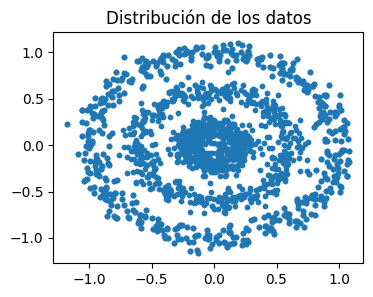

In [2]:
X_circles1, _ = make_circles(n_samples=1000, factor=.6, noise=.07, random_state=42)
X_circles2, _ = make_circles(n_samples=1000, factor=.2, noise=.07, random_state=42)

# Juntamos los datos en un solo conjunto.
X_circles = np.vstack((X_circles1, X_circles2))

# Graficamos los datos.
plt.figure(figsize=(4, 3))
plt.scatter(X_circles[:, 0], X_circles[:, 1], s=10)
plt.title('Distribución de los datos')
plt.show()

## <font color='264CC7'> k-Means Clustering (6 puntos) </font>

### <font color='264CC7'> Parte 1: Determinación del número de clústeres </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Aplica el método del codo para determinar el número óptimo de clústeres:
<ul>
<li>Calcula la inercia para valores de k de 1 a 10.</li>
<li>Grafica la inercia frente al número de clústeres.</li>
<li>Identifica visualmente el punto del "codo" y justifica tu elección desde una perspectiva matemática y conceptual.</li>
</ul>
</div>

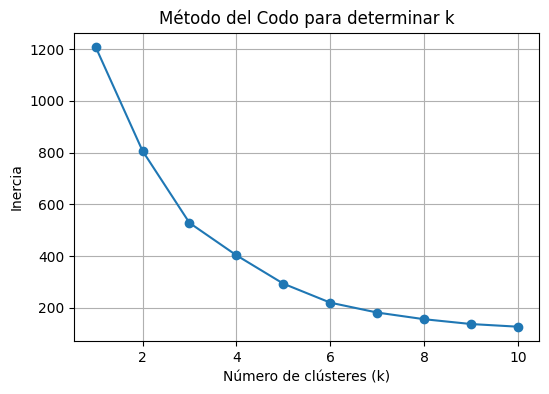

In [3]:
# Método del codo
inercia = []

# Probaremos valores de k entre 1 y 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_circles)
    inercia.append(kmeans.inertia_)

# Graficamos la inercia
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), inercia, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar k')
plt.grid(True)
plt.show()

Observando la gráfica, podemos decir que a partir de k=4, la reducción de la inercia ya no es tan grande, por lo que, agregar más clústeres no mejoraría sustancialmente la agrupación. Por esta razón, seleccioné 4 clústeres como el número óptimo, ya que representa un equilibrio entre precisión y simplicidad del modelo. Visualmente el codo se encuentra entre k=4 y k=6

### <font color='264CC7'> Evaluación crítica del método </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Entrena un modelo de K-Means con el número de clústeres seleccionado. Luego:
<ul>
<li>Grafica los datos coloreados según la asignación de clúster.</li>
<li>Explica si el modelo ha logrado identificar la estructura natural de los datos. ¿Qué limitaciones observas en el resultado?</li>
<li>Reflexiona sobre las condiciones geométricas bajo las cuales K-Means funciona adecuadamente y por qué podría no ser el algoritmo más adecuado para este tipo de distribución.</li>
</ul>
</div>

#### Gráfico de Clusters por K-Means

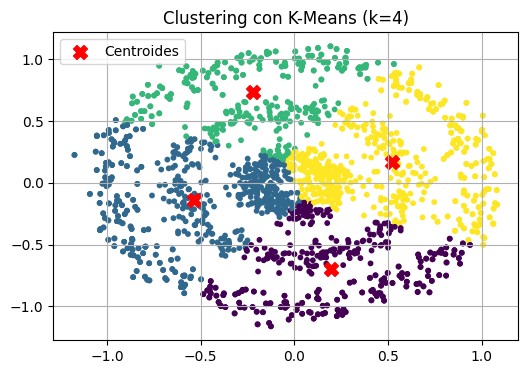

In [4]:
# Entrenamos K-Means con 4 clústeres
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_circles)

# Graficamos la asignación de clústeres
plt.figure(figsize=(6,4))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_kmeans, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=100, label='Centroides')
plt.title('Clustering con K-Means (k=4)')
plt.legend()
plt.grid(True)
plt.show()


#### Evaluación del modelo K-Means

1. **¿Ha logrado el modelo identificar la estructura natural de los datos? ¿Qué limitaciones observas en el resultado?**

   No, el modelo K-Means no ha logrado identificar correctamente la estructura natural de los datos, el algoritmo no captura la complejidad geométrica de los datos. K-Means tiene la limitación de asumir que los clusters son esféricos y convexos, lo cual no se cumple en este caso, ya que los puntos están distribuidos en círculos concéntricos. Como resultado, el modelo genera particiones incorrectas, especialmente en las áreas de frontera entre los anillos, donde los puntos pueden ser mal clasificados.

2. **¿Bajo qué condiciones geométricas funciona adecuadamente K-Means y por qué podría no ser el algoritmo más adecuado para este tipo de distribución?**

   K-Means funciona adecuadamente cuando los clusters tienen formas convexas, especialmente esféricas. El algoritmo es efectivo cuando los clusters son compactos y bien separados. Sin embargo, en este caso, los datos siguen una distribución en forma de anillos, que no es convexa ni esférica, por lo que K-Means es un algoritmo inapropiado para esta distribución. Algoritmos como DBSCAN, que no dependen de formas geométricas predefinidas, serían más adecuados para manejar este tipo de datos.


---
## <font color='264CC7'> Agrupamiento Jerárquico (7 puntos) </font>

### <font color='264CC7'> Análisis comparativo de criterios de enlace </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
Realiza un análisis exhaustivo de agrupamiento jerárquico utilizando distintos criterios de enlace:
<ul>
  <li>Define una lista de métodos de enlace: 'single', 'complete', 'average', 'ward'.</li>
  <li>Para cada criterio, ejecuta los siguientes pasos:
    <ul>
      <li>Aplica el algoritmo de clustering jerárquico a los datos.</li>
      <li>Segmenta el dataset en tres clústeres utilizando un umbral adecuado en el dendrograma.</li>
      <li>Visualiza, para cada criterio:
        <ul>
          <li>Un gráfico de dispersión de los datos coloreados por clúster.</li>
          <li>El dendrograma correspondiente, señalando visualmente el corte realizado.</li>
        </ul>
      </li>
    </ul>
  </li>
  <li>Organiza todas las visualizaciones en un único conjunto de subplots, con dos columnas (gráfico de dispersión / dendrograma) y cuatro filas (uno por cada método de enlace).</li>
</ul>
</div>


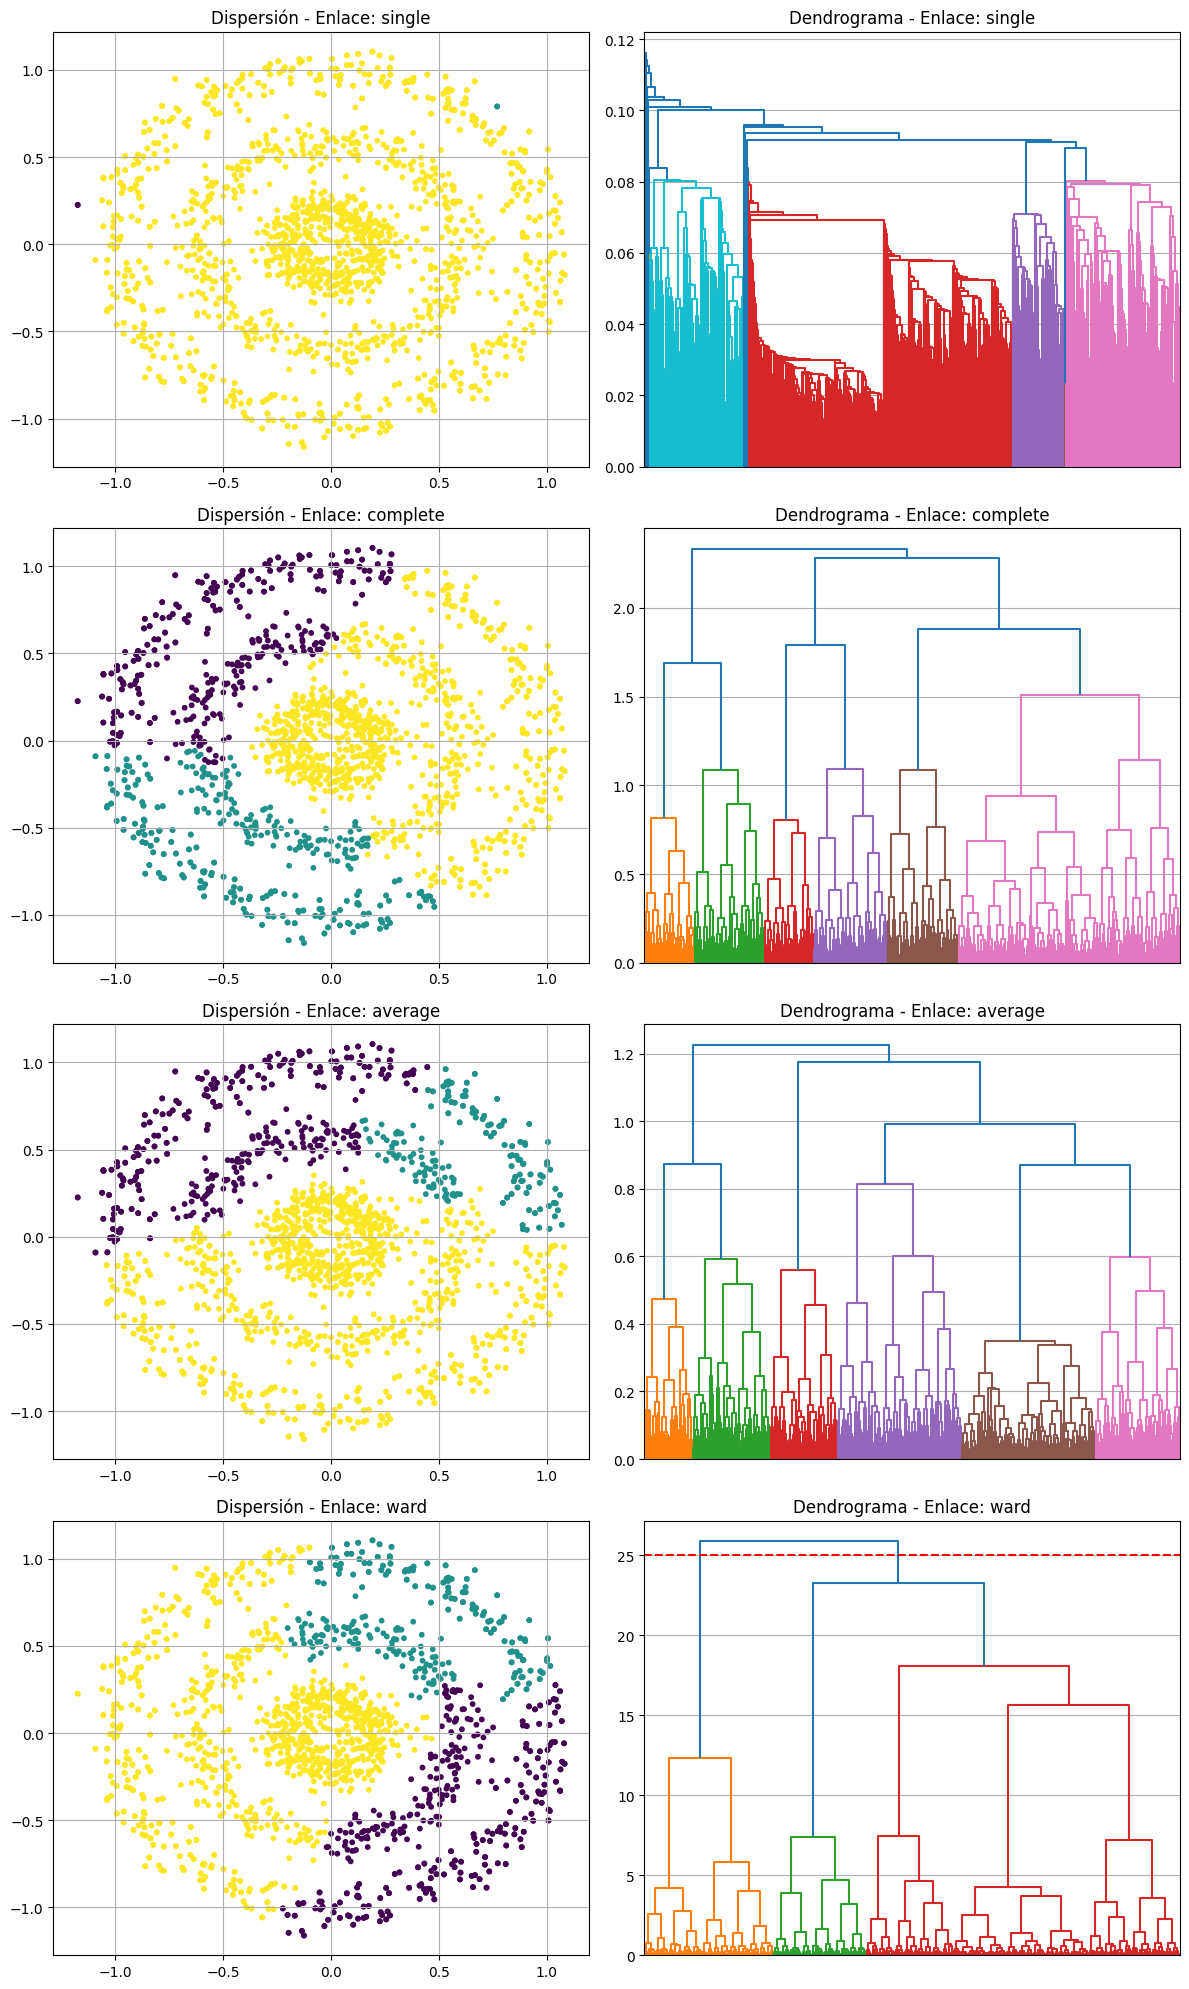

In [5]:
# Definimos los métodos de enlace a comparar
metodos_enlace = ['single', 'complete', 'average', 'ward']

# Creamos la figura con 4 filas y 2 columnas de subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 20))

# Iteramos sobre cada método de enlace
for idx, metodo in enumerate(metodos_enlace):

    # Paso 1: Aplicar clustering jerárquico
    linkage_matrix = linkage(X_circles, method=metodo)

    # Paso 2: Crear etiquetas de clúster cortando el dendrograma
    # Queremos 3 clústeres, así que usamos fcluster con t=3 y criterio 'maxclust'
    etiquetas = fcluster(linkage_matrix, t=3, criterion='maxclust')

    # Paso 3: Graficar los datos coloreados por clúster
    ax_dispersion = axes[idx, 0]
    scatter = ax_dispersion.scatter(X_circles[:, 0], X_circles[:, 1], c=etiquetas, cmap='viridis', s=10)
    ax_dispersion.set_title(f'Dispersión - Enlace: {metodo}')
    ax_dispersion.grid(True)

    # Paso 4: Graficar el dendrograma
    ax_dendrograma = axes[idx, 1]
    dendrogram(linkage_matrix, ax=ax_dendrograma, color_threshold=None, no_labels=True)
    # Dibujamos línea horizontal para indicar corte (opcionalmente podemos buscar un umbral razonable)
    # En general, para este tipo de datos pondremos un corte más arriba de las divisiones más grandes
    ax_dendrograma.axhline(y=25, color='red', linestyle='--')
    ax_dendrograma.set_title(f'Dendrograma - Enlace: {metodo}')
    ax_dendrograma.grid(True)

# Ajustamos la distribución del espacio
plt.tight_layout()
plt.show()


### <font color='264CC7'> Evaluación crítica del método </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Analiza y responde:
<ul>
  <li>¿Cuál de los métodos ('single', 'complete', 'average', 'ward') ha capturado mejor la estructura subyacente de los datos? Justifica tu respuesta en términos de:
    <ul>
      <li>Separabilidad visual de los clústeres.</li>
      <li>Forma y cohesión de los grupos encontrados.</li>
      <li>Propiedades geométricas del dataset inicial.</li>
    </ul>
  </li>
  <li>Discute brevemente una ventaja y una desventaja del uso de agrupamiento jerárquico frente a métodos particionales como K-Means en este tipo de problemas.</li>
</ul>
</div>

**Ninguno** de los métodos captura perfectamente la estructura espiral no convexa. Aunque 'complete' y 'average' son mejores que 'single' (encadenamiento) y 'ward' (asunción de esfericidad), aún muestran mezcla de puntos entre espirales. El agrupamiento jerárquico basado en distancia euclidiana tiene dificultades inherentes para discernir la continuidad y separación en formas complejas como estas.

**Ventaja**: El agrupamiento jerárquico no requiere predefinir el número de clústeres, permitiendo explorar diferentes niveles de agrupamiento, lo cual es útil cuando la estructura de los datos no es clara de antemano.

**Desventaja**: A diferencia de K-Means, el agrupamiento jerárquico puede ser computacionalmente más costoso para datasets grandes, y las decisiones de fusión son irreversibles, lo que puede llevar a agrupaciones subóptimas que no se pueden corregir en etapas posteriores.

---
## <font color='264CC7'> Algoritmos basados en densidad: DBSCAN (8 puntos) </font>

### <font color='264CC7'> Ajuste de parámetros y análisis </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
Explora el comportamiento de DBSCAN variando el parámetro <code>eps</code>:
<ul>
  <li>Aplica el algoritmo DBSCAN con <code>min_samples=5</code> y <code>eps</code> en los valores {0.07, 0.08, 0.09, 0.10}.</li>
  <li>Para cada configuración:
    <ul>
      <li>Visualiza los resultados mediante un gráfico de dispersión, coloreando por clúster e identificando valores atípicos (noise).</li>
      <li>Incluye el número de clústeres y el porcentaje de puntos clasificados como ruido en el título de cada gráfico.</li>
    </ul>
  </li>
  <li>Organiza las visualizaciones en subplots (2 filas x 2 columnas).</li>
  <li>Selecciona el mejor valor de <code>eps</code> con base en:
    <ul>
      <li>Separación visual de los clústeres.</li>
      <li>Minimización de puntos etiquetados como ruido, sin pérdida de estructura natural.</li>
    </ul>
  </li>
  <li>Justifica tu elección en no más de cinco líneas.</li>
</ul>
</div>

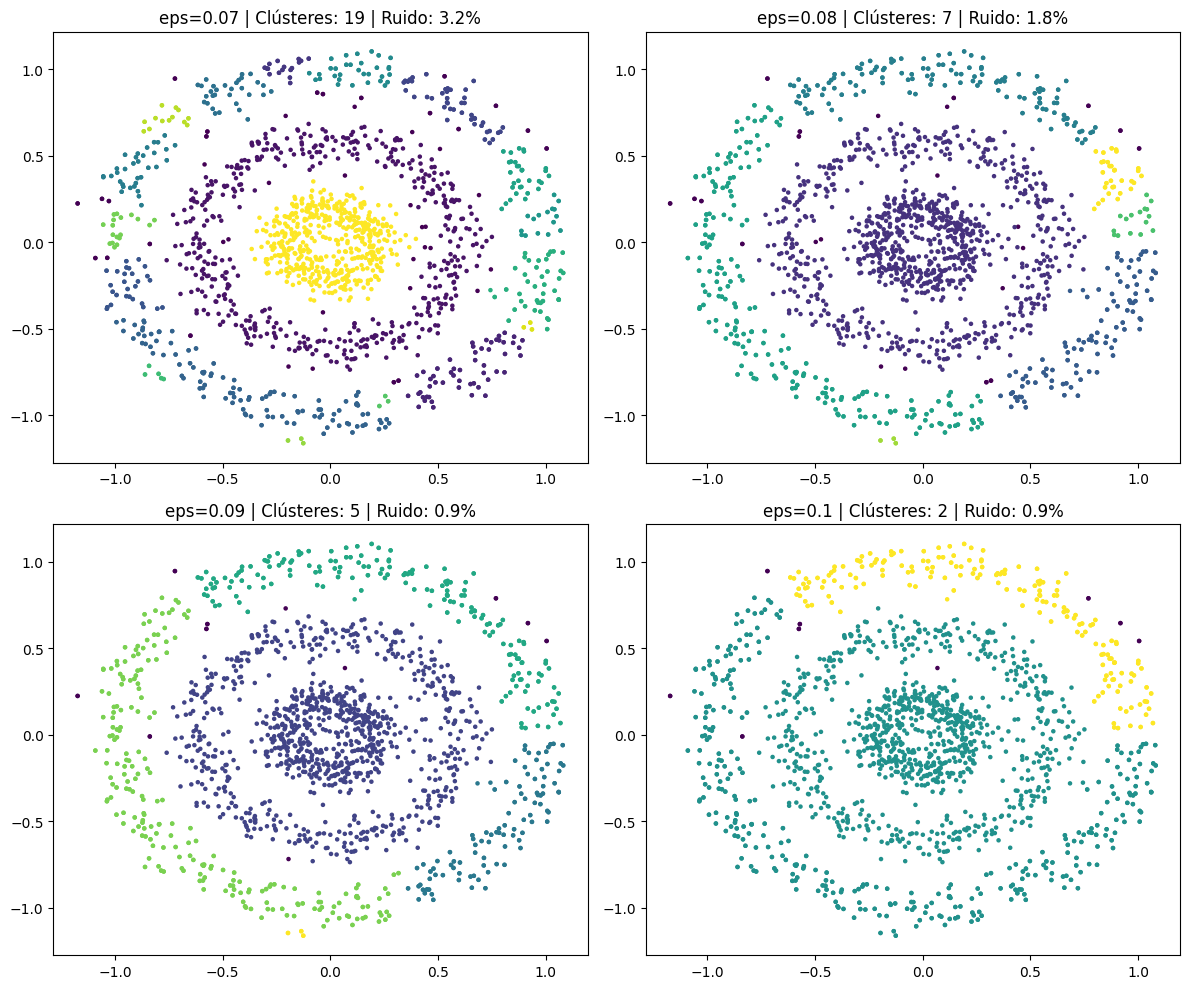

In [6]:
# Definimos los parámetros
eps_values = [0.07, 0.08, 0.09, 0.10]
min_samples = 5

# Creamos los subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_circles)  # Usa tu dataset original X

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_pct = np.sum(labels == -1) / len(labels) * 100

    scatter = axes[i].scatter(X_circles[:, 0], X_circles[:, 1], c=labels, cmap='viridis', s=5)
    axes[i].set_title(f'eps={eps} | Clústeres: {n_clusters} | Ruido: {noise_pct:.1f}%')

plt.tight_layout()
plt.show()

El mejor valor de eps es 0.08.

Con este valor, se capturan las tres espirales concéntricas de forma más detallada que con eps=0.09 o eps=0.1, donde se pierden divisiones importantes. Además, el ruido (1.8%) es bajo y menor que con eps=0.07 (3.2%), sin sacrificar la identificación de la estructura natural de las espirales.

### <font color='264CC7'> Profundización en el ajuste de <code>min_samples</code> </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
Con el mejor valor de <code>eps</code> encontrado:
<ul>
  <li>Varia el parámetro <code>min_samples</code> en los valores {4, 5, 6, 7}.</li>
  <li>Para cada caso:
    <ul>
      <li>Visualiza los resultados mediante un gráfico de dispersión, con la misma codificación de colores.</li>
      <li>Indica en el título el número de clústeres detectados y el porcentaje de ruido.</li>
    </ul>
  </li>
  <li>Organiza los resultados en subplots (2 filas x 2 columnas).</li>
  <li>Compara los efectos de variar <code>min_samples</code> sobre la detección de clústeres y la sensibilidad ante el ruido.</li>
</ul>
</div>

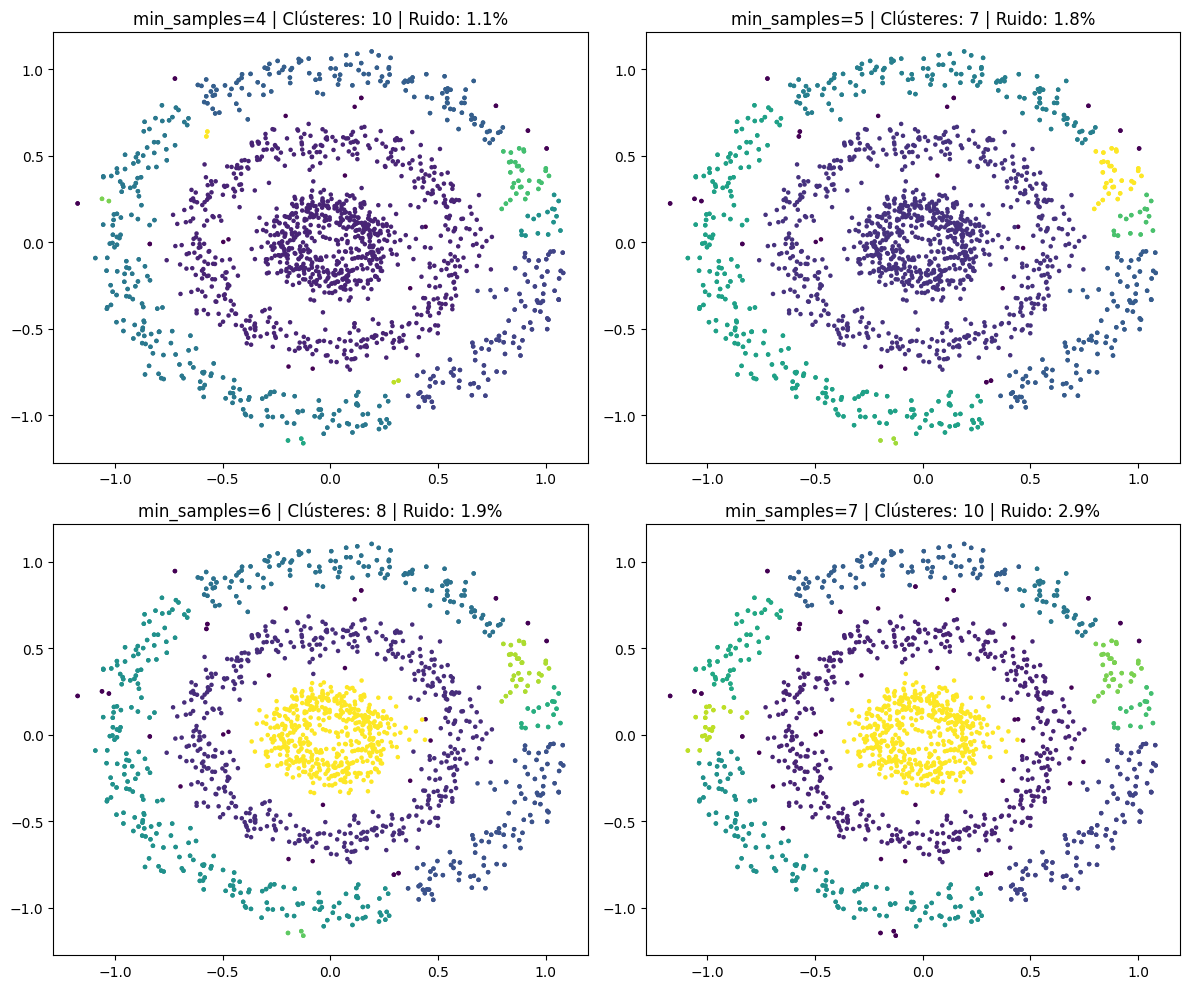

In [7]:
# Ejercicio: Exploración de DBSCAN variando min_samples con eps=0.08

# Definimos los nuevos parámetros
min_samples_values = [4, 5, 6, 7]
eps = 0.08

# Creamos los subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, min_samples in enumerate(min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_circles)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_pct = np.sum(labels == -1) / len(labels) * 100

    scatter = axes[i].scatter(X_circles[:, 0], X_circles[:, 1], c=labels, cmap='viridis', s=5)
    axes[i].set_title(f'min_samples={min_samples} | Clústeres: {n_clusters} | Ruido: {noise_pct:.1f}%')

plt.tight_layout()
plt.show()


### <font color='264CC7'> Análisis </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Reflexiona críticamente sobre los resultados obtenidos:
<ul>
  <li>Describe cómo cambiaron los clústeres y la cantidad de ruido al variar los parámetros <code>eps</code> y <code>min_samples</code>.</li>
  <li>Explica qué configuraciones favorecieron una mejor separación de los clústeres naturales.</li>
  <li>Justifica, con base en las características geométricas del dataset (círculos), por qué DBSCAN puede detectar estructuras que otros métodos como K-Means no identifican adecuadamente.</li>
</ul>
</div>


Variar eps y min_samples modifica la densidad requerida para formar clústeres. Se observa que un Eps pequeño genera más clústeres y ruido; un eps grande, menos. Min_samples bajo permite clústeres menos densos; alto, requiere mayor densidad.

La mejor separación se da con eps intermedio y min_samples bajo, equilibrando la identificación de las espirales sin exceso de ruido.

DBSCAN supera a K-Means aquí porque no asume formas esféricas, sino que se basa en la densidad, lo que le permite seguir las formas curvas y no convexas de las espirales (que son densas y contiguas), mientras que K-Means intenta ajustarlas a formas más circulares o las divide incorrectamente al basarse en la distancia a centroides.

---
<a id="ej2"></a>
# <font color='264CC7'> Ejemplo práctico (25 puntos) </font>

Trabajarás con un subconjunto del conjunto de datos **MNIST**, que contiene imágenes de dígitos escritos a mano. Tu objetivo es aplicar técnicas de *clustering* para agrupar las imágenes según patrones estructurales, sin usar las etiquetas reales.

Utilizarás los siguientes datos (cambia la semilla por los últimos 2 dígitos de tu cédula):

In [8]:
# Cargamos el dataset MNIST
X, y = fetch_openml('mnist_784', return_X_y=True, parser='auto')

# Tomo aleatoriamente 1000 muestras
np.random.seed(76)
indices = np.random.choice(len(X), 5000, replace=False)
X = X.iloc[indices]
y = y[indices]
# Reinicio los índices
X.reset_index(drop=True, inplace=True)

display(X.head())

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### <font color='264CC7'> Introducción y Contexto (2 puntos) </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Investiga:
<ul>
  <li>¿Qué es el dataset MNIST y cuál es su relevancia en la investigación en Machine Learning?</li>
  <li>Describe su estructura: ¿qué representan las filas y las columnas?</li>
  <li>Incluye al menos dos referencias bibliográficas correctamente citadas.</li>
</ul>
</div>


**¿Qué es el dataset MNIST y por qué es relevante?**
MNIST es una base de datos de imágenes de dígitos manuscritos (0-9), ampliamente utilizada como benchmark en Machine Learning, especialmente para tareas de reconocimiento y clasificación de imágenes. Su relevancia radica en que permite comparar de manera estandarizada el desempeño de algoritmos y modelos, y es un recurso educativo y experimental fundamental en la comunidad científica.

**Estructura del dataset**
Filas: Cada fila representa una imagen de un dígito manuscrito.

Columnas: Cada columna es un píxel (28×28 = 784 columnas), con valores de intensidad de gris (0-255).

Etiqueta: Cada imagen tiene asociada una etiqueta que indica el dígito que representa (0-9).

**Referencias**
LeCun, Y. et al. (1998). Gradient-based learning applied to document recognition. Proceedings of the IEEE, 86(11), 2278–2324.

Deng, L. (2012). The MNIST Database of Handwritten Digit Images for Machine Learning Research. IEEE Signal Processing Magazine, 29(6), 141–142.

Para poder visualizar los datos, los convertiremos en un formato de imagen.

In [9]:
# Reorganizar los datos para que sean imágenes
n_images = X.shape[0]
X_images = X.to_numpy().reshape(n_images, 28, 28)
X = X_images.reshape(n_images, 28 * 28)

Con esto, podemos visualizar las imágenes de los dígitos y analizar los resultados obtenidos. Por ejemplo:

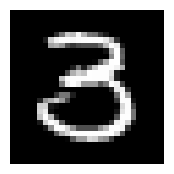

In [10]:
# Graficamos una imagen
plt.figure(figsize=(2, 2))
plt.imshow(X_images[75], cmap='gray') # Cambiar por últimos dígitos de tu cédula
plt.axis('off')
plt.show()

---

## <font color='264CC7'> k-Means (9 puntos) </font>

### <font color='264CC7'> Determinación del número de clústeres </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
Aplica el método del codo para determinar el número óptimo de clústeres:
<ul>
  <li>Entrena modelos de K-Means para valores de k entre 1 y 20.</li>
  <li>Genera una gráfica de inercia frente al número de clústeres.</li>
  <li>Identifica visualmente el punto del "codo" y selecciona el número óptimo de clústeres.</li>
  <li>Discute:
    <ul>
      <li>¿El número óptimo coincide con el número de dígitos (0–9)?</li>
      <li>¿Qué dificultades podría presentar este conjunto de datos para el método de K-Means?</li>
    </ul>
  </li>
</ul>
</div>

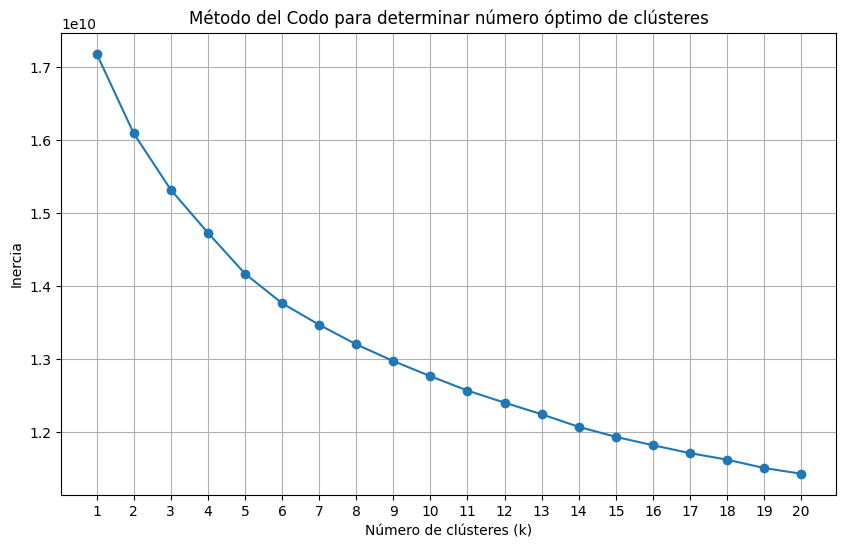

In [11]:
# Lista para almacenar los valores de inercia
inertias = []

# Entrenamos modelos de K-Means para k entre 1 y 20
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=76, n_init=10)  # n_init=10 es buena práctica
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)  # Guardamos la inercia para cada k

# Graficamos inercia vs número de clústeres
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), inertias, marker='o')
plt.title('Método del Codo para determinar número óptimo de clústeres')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

**¿El número óptimo coincide con el número de dígitos (0–9)?**
- No, visualmente desde k=5 añadir más clústeres solo proporciona ganancias marginales en la reducción de la inercia.

**¿Qué dificultades podría presentar este conjunto de datos para el método de K-Means?**
- K-Means asume que los clústeres son esféricos y de tamaño similar, lo cual no siempre ocurre en imágenes de dígitos.
- Diferentes personas escriben los mismos números de maneras muy distintas (alta variabilidad intra-clase).
- Algunos dígitos pueden ser muy parecidos entre sí (por ejemplo, un 1 y un 7 pueden confundirse).
- Los datos tienen alta dimensionalidad (784 dimensiones), lo que dificulta la separación clara de clústeres.

### <font color='264CC7'> Asignación de grupos y visualización </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Asigna los datos a los clústeres obtenidos:
<ul>
  <li>Muestra cinco imágenes aleatorias de cada clúster asignado.</li>
  <li>Organiza las imágenes en una figura clara y etiquetada.</li>
</ul>
</div>

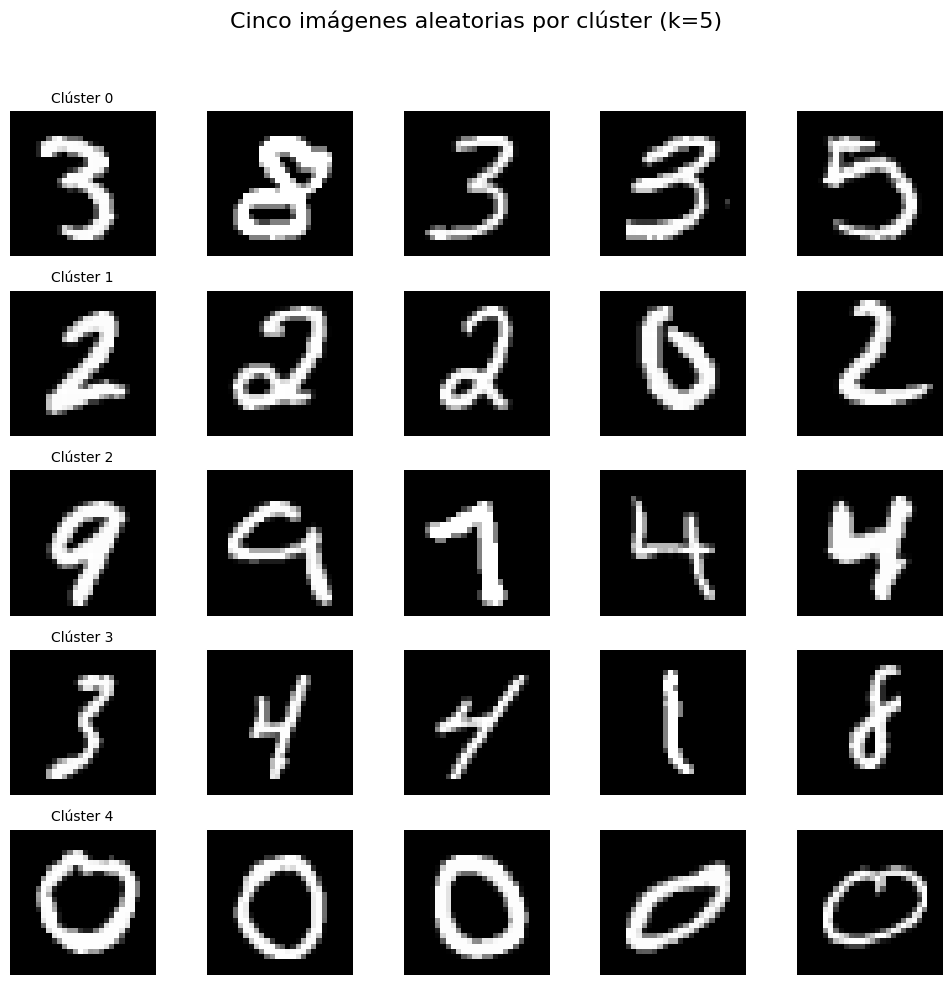

In [12]:
# --- Asignación de datos a clústeres con k=5 y visualización ---

# Ajustamos el modelo de K-Means con k=5
kmeans_5 = KMeans(n_clusters=5, random_state=76, n_init=10)
cluster_labels = kmeans_5.fit_predict(X)

# Organizamos las imágenes por clúster
clusters = {i: np.where(cluster_labels == i)[0] for i in range(5)}

# Configuramos la figura
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
fig.suptitle('Cinco imágenes aleatorias por clúster (k=5)', fontsize=16)

# Para cada clúster
for cluster_id in range(5):
    # Seleccionamos 5 imágenes aleatorias del clúster
    selected_indices = np.random.choice(clusters[cluster_id], 5, replace=False)

    for idx, image_idx in enumerate(selected_indices):
        ax = axes[cluster_id, idx]
        ax.imshow(X_images[image_idx], cmap='gray')
        ax.axis('off')
        if idx == 0:
            ax.set_title(f'Clúster {cluster_id}', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### <font color='264CC7'> Descripción de los clústeres </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Analiza los grupos formados:
<ul>
  <li>Describe las principales características visuales de cada grupo.</li>
  <li>Asigna un "nombre" representativo a cada clúster (por ejemplo: "número 3 estilizado", "número 8 redondeado", etc.).</li>
</ul>
</div>

---

### Clúster 0

**Características Visuales:** Predominan los dígitos con formas que recuerdan a un "3" o una "S" invertida. Se aprecian trazos curvos y diagonales que se conectan entre sí. Algunos ejemplos muestran una parte superior más cerrada.

**Nombre Representativo:** Tres y ochos angulares/conectados.

---

### Clúster 1

**Características Visuales:** Este grupo se distingue por dígitos que presentan curvas cerradas en la parte inferior, combinadas con trazos verticales o diagonales en la sección superior. Se identifican claramente varios ejemplos del dígito "2", así como algunos "0" con una forma más alargada o con un trazo diagonal perceptible.

**Nombre Representativo:** Dos y ceros alargados/curvos inferiores.

---

### Clúster 2

**Características Visuales:** Los dígitos en este clúster se caracterizan por tener trazos rectos y diagonales bien definidos, formando ángulos más pronunciados. Se distinguen los dígitos "9", "7" y "4". Algunas instancias del "4" presentan la parte superior abierta.

**Nombre Representativo:** Sietes, cuatros y nueves angulares.

---

### Clúster 3

**Características Visuales:** Este clúster muestra una mayor heterogeneidad en las formas. Se observan algunos "3" con una estructura más abierta, un "4" con la parte superior cerrada, un "1" de trazo delgado, un "8" con bucles más separados y lo que podría ser un "6" o un "0" incompleto.

**Nombre Representativo:** Mezcla de formas abiertas y delgadas.

---

### Clúster 4

**Características Visuales:** La principal característica de este grupo son los dígitos con formas claramente circulares u ovaladas, siendo el "0" el más predominante. Algunos ejemplos muestran el "0" ligeramente inclinado o con un grosor de trazo mayor.

**Nombre Representativo:** Ceros redondos/ovalados.

---


### <font color='264CC7'> Evaluación cuantitativa de los clústeres </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Evalúa objetivamente la calidad de los clústeres:
<ul>
  <li>Calcula el promedio del índice de silueta para la partición obtenida.</li>
  <li>Interpreta el valor: ¿qué tan compactos y bien separados son los grupos?</li>
</ul>
</div>

In [13]:
# Calculamos el índice de silueta
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"El índice de silueta promedio es: {silhouette_avg}")


El índice de silueta promedio es: 0.06445974654396971


El bajo índice de silueta obtenido sugiere que el clustering con k=5 **no es una buena representació**n de la estructura subyacente de los datos MNIST. Los grupos formados son débiles y los puntos no están claramente asignados a clústeres distintos.
Esto podría indicar que el número de clústeres elegido no es apropiado, o que "K-Means" en sí mismo **no es el algoritmo más adecuado** para este dataset con la representación de características utilizada.

---
## <font color='264CC7'> Reducción de dimensiones y k-Means (11 puntos) </font>

### <font color='264CC7'> Reducción de dimensiones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
    Realiza una reducción de dimensiones de los datos utilizando PCA.
<ul>
  <li>Realiza un análisis de componentes principales para 100 componentes y grafica la varianza explicada acumulada.</li>
  <li>Selecciona el número de componentes principales que expliquen al menos el 80% de la varianza.</li>
  <li>Transforma los datos originales en el espacio de las componentes principales.</li>
</ul>
</div>

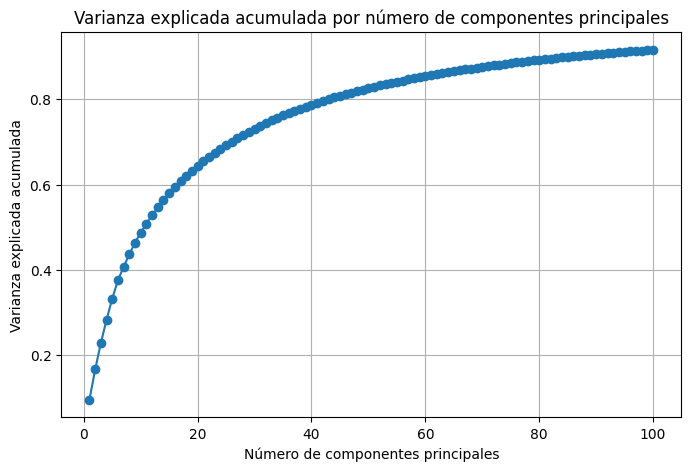

Número de componentes necesarios para explicar al menos el 80% de la varianza: 43


In [14]:
# Ajustamos PCA para 100 componentes
pca = PCA(n_components=100, random_state=76)
pca.fit(X)

# Calculamos la varianza explicada acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Graficamos la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, 101), varianza_acumulada, marker='o')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

# Seleccionamos el número de componentes que explican al menos el 80% de la varianza
n_componentes_80 = np.argmax(varianza_acumulada >= 0.80) + 1  # sumamos 1 porque el índice empieza en 0

print(f'Número de componentes necesarios para explicar al menos el 80% de la varianza: {n_componentes_80}')

# Transformamos los datos originales al nuevo espacio de componentes principales
pca_final = PCA(n_components=n_componentes_80, random_state=76)
X_pca = pca_final.fit_transform(X)

# X_pca ahora contiene la representación reducida de los datos


### <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio  (2 puntos):</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 20.</li>
  <li>Identifica visualmente el «codo» en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>¿Concuerda tu elección con el número de dígitos que se esperan en el conjunto de datos? Explica qué está pasando.</li>
</ul>
</div>

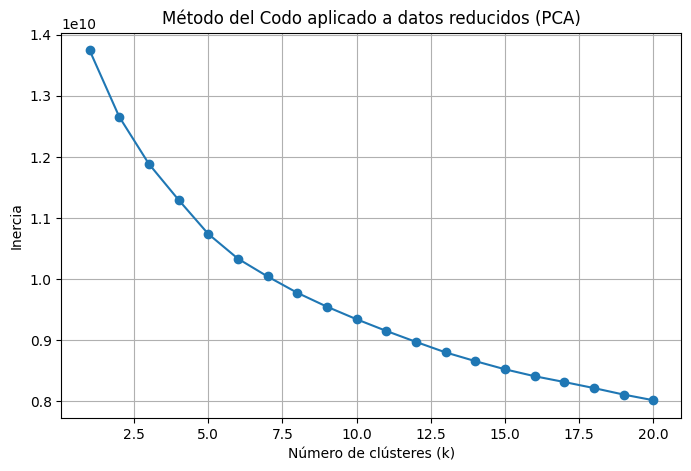

In [15]:
inercia_pca = []

# Entrenamos modelos de K-Means con k de 1 a 20
for k in range(1, 21):
    kmeans_pca = KMeans(n_clusters=k, random_state=76, n_init=10)
    kmeans_pca.fit(X_pca)
    inercia_pca.append(kmeans_pca.inertia_)

# Graficamos la inercia frente al número de clústeres
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), inercia_pca, marker='o')
plt.title('Método del Codo aplicado a datos reducidos (PCA)')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()



El gráfico sugiere que el número óptimo de clústeres es 5, lo cual no coincide con los 10 dígitos reales. Esto se debe a que K-Means agrupa según la variación en las características transformadas, no necesariamente alineadas con las categorías semánticas. Para identificar los 10 dígitos correctamente, se necesitarían métodos más avanzados o supervisados, como DBSCAN, que no asumen formas ni tamaños específicos de los clústeres.


### <font color='264CC7'> Asignación de grupos y análisis </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Muestra 5 integrantes de cada grupo (como imágenes).</li>
</ul>
</div>

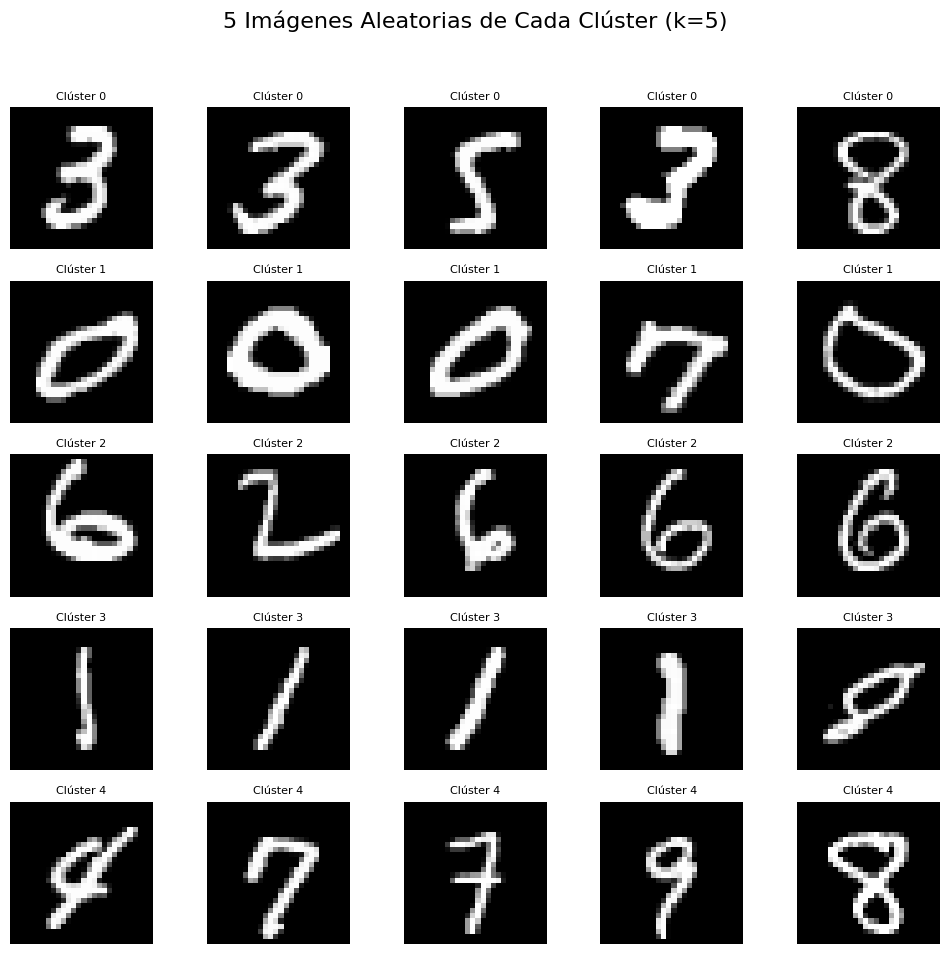

In [16]:
# Entrenamos KMeans con k=5
kmeans_final = KMeans(n_clusters=5, random_state=76, n_init=10)
labels_pca = kmeans_final.fit_predict(X_pca)

# Creamos un DataFrame para organizar imágenes y etiquetas
df_clusters = pd.DataFrame({'label_cluster': labels_pca})

# Mostramos 5 imágenes aleatorias de cada grupo
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
fig.suptitle('5 Imágenes Aleatorias de Cada Clúster (k=5)', fontsize=16)

for cluster_id in range(5):
    # Índices de las imágenes que pertenecen a cada clúster
    indices = df_clusters[df_clusters['label_cluster'] == cluster_id].index
    # Seleccionamos 5 imágenes aleatorias de este clúster
    muestras = np.random.choice(indices, size=5, replace=False)

    for i, idx in enumerate(muestras):
        ax = axes[cluster_id, i]
        ax.imshow(X_images[idx], cmap='gray')
        ax.axis('off')
        ax.set_title(f'Clúster {cluster_id}', fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>


---

### Clúster 0

**Características Visuales:** Predominan los dígitos con formas que incluyen curvas amplias y bucles, principalmente el "3" y el "8". Los trazos tienden a ser más gruesos y redondeados.

**Nombre Representativo:** Tres y ochos curvos/gruesos.

---

### Clúster 1

**Características Visuales:** Este grupo se caracteriza por dígitos con formas circulares u ovaladas, principalmente el "0". También se observa un "6" invertido o un "9" con la parte superior cerrada, y un "7" con una base curva.

**Nombre Representativo:** Ceros y formas circulares/curvas cerradas.

---

### Clúster 2

**Características Visuales:** Los dígitos en este clúster muestran una fuerte presencia de curvas cerradas y bucles, identificándose principalmente el "6". Algunos ejemplos varían en el tamaño del bucle superior y la conexión con el trazo inferior.

**Nombre Representativo:** Seises con bucles definidos.

---

### Clúster 3

**Características Visuales:** La característica principal de este grupo son los dígitos con trazos verticales o ligeramente inclinados y delgados, claramente el "1". También se observa una forma que podría ser un "7" muy estilizado o un "4" incompleto.

**Nombre Representativo:** Unos delgados/verticales.

---

### Clúster 4

**Características Visuales:** Este clúster presenta una mezcla de dígitos con trazos diagonales y rectos. Se identifican "4", "7", "9" y un "8" con una forma más angular.

**Nombre Representativo:** Cuatros, sietes y nueves angulares/diagonales.

---





<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [17]:

silhouette_avg_pca = silhouette_score(X_pca, labels_pca)
print(f"El índice de silueta promedio para los datos con PCA es: {silhouette_avg_pca}")


El índice de silueta promedio para los datos con PCA es: 0.08850931527052104


Los grupos son malos. Hay mucha mezcla de dígitos diferentes en cada clúster, indicando que K-Means no separa bien las clases. El bajo índice de silueta (0.0885) confirma que los clústeres están superpuestos y mal definidos. Aunque ligeramente mejor que sin PCA, sigue siendo un clustering pobre para identificar los 10 dígitos. Lo cual se podría solucionar probando con otros algoritmos de Agrupamiento No Supervisado com DBSCAN.

---
## <font color='264CC7'> Análisis finial (3 puntos) </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
    Realiza un análisis crítico de los resultados obtenidos en los distintos modelos de *clustering*. ¿Qué modelo se ha comportado mejor? ¿Por qué?
</div>


Los modelos aplicados mostraron limitaciones inherentes a sus metodologías y a la naturaleza de los datos. Para las espirales no convexas, los métodos jerárquicos (enlace completo/promedio) fueron visualmente mejores que el enlace simple o Ward, y significativamente superiores a K-Means, que impuso agrupaciones circulares inapropiadas. Sin embargo, incluso los mejores métodos jerárquicos mostraron imperfecciones. **En contraste, DBSCAN demostró buenos resultados visuales para las espirales, logrando capturar la forma no convexa de los clústeres de manera más efectiva que K-Means y los métodos jerárquicos** seleccionando un epsilon y el mínimo de puntos adecuado.

En MNIST, K-Means (con y sin PCA) falló en agrupar los dígitos de manera semánticamente coherente, evidenciado por la mezcla de clases y bajos índices de silueta. PCA ofreció una mejora marginal en la métrica, pero no en la calidad de los clústeres visuales. El Método del Codo sugirió un 'k' subóptimo para MNIST.

En general, los algoritmos basados en distancia (jerárquico y K-Means) lucharon con la geometría no esférica de las espirales y la complejidad intrínseca de los dígitos MNIST en el espacio de características. La elección de 'k' en K-Means y la sensibilidad a la forma de los clústeres fueron factores clave. **DBSCAN, al basarse en densidad, demostró ser más adecuado para identificar la estructura no lineal de las espirales.** Los resultados subrayan la necesidad de seleccionar algoritmos y representaciones de datos que se alineen mejor con la estructura esperada y las características de los datos subyacentes.